# Sampling the Imaginary

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pymc3 as pm
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### 3.1

In [3]:
PrPV = 0.95
PrPM = 0.01
PrV = 0.001
PrP = PrPV*PrV + PrPM*(1-PrV)
PrV = PrPV*PrV / PrP
PrV

0.08683729433272395

## Sampling from a grid-approximate posterior

### 3.2

In [4]:
p_grid = np.linspace(0, 1, 1000)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(6, 9, p_grid)
posterior = likelihood * prior
posterior = posterior / sum(posterior)

### 3.3

In [5]:
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

### 3.4

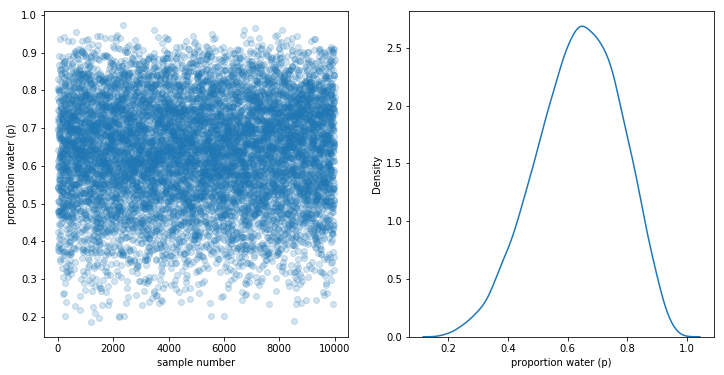

In [6]:
f, (ax0, ax1) = plt.subplots(1, 2)
f.set_size_inches(12, 6)

ax0.plot(samples, "o", alpha=0.2)
ax0.set_xlabel('sample number')
ax0.set_ylabel('proportion water (p)')

sns.kdeplot(samples, ax=ax1)
ax1.set_xlabel('proportion water (p)')
ax1.set_ylabel('Density');

## Sampling to Summarize

### 3.6

In [7]:
# add up posterior probability where p < 0.5
sum(posterior[p_grid < 0.5])

0.17187458902022879

### 3.7

In [8]:
sum(samples < 0.5)/1e4

0.1727

### 3.8

In [9]:
sum((0.5 < samples) & (samples < 0.75))/1e4

0.6022

### 3.9

In [10]:
np.percentile(samples, 80)

0.7607607607607607

### 3.10

In [11]:
np.percentile(samples, [10, 90])

array([0.44744745, 0.81581582])

### 3.11

In [12]:
p_grid = np.linspace(0, 1, 1000)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(3, 3, p_grid)
posterior = likelihood * prior
posterior = posterior/sum(posterior)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

### 3.12

In [13]:
np.percentile(samples, [25, 75])

array([0.70770771, 0.93193193])

### 3.13

In [14]:
pm.hpd(samples, alpha=(1-0.5))

array([0.84284284, 0.998999  ])

### 3.14

In [15]:
p_grid[np.argmax(posterior)]

1.0

### 3.15

In [16]:
stats.mode(samples)[0]

array([0.99399399])

### 3.16

In [17]:
np.mean(samples), np.median(samples)

(0.8010419419419419, 0.8438438438438438)

### 3.17

In [18]:
sum(posterior*np.abs(0.5 - p_grid))

0.3128751874998123

### 3.18

In [19]:
loss = [sum(posterior*np.abs(x - p_grid)) for x in p_grid]

### 3.19

In [20]:
p_grid[np.argmin(loss)]

0.8408408408408409

## Sampling to simulate prediction

### 3.20

In [21]:
stats.binom.pmf(range(3), 2, 0.7)

array([0.09, 0.42, 0.49])

### 3.21

In [22]:
stats.binom.rvs(n=2, p=0.7, size=1)

array([2])

### 3.22

In [23]:
stats.binom.rvs(n=2, p=0.7, size=10)

array([1, 2, 2, 2, 1, 1, 2, 1, 1, 2])

### 3.23

In [24]:
from collections import Counter
dummy_w = stats.binom.rvs(n=2, p=0.7, size=int(1e5))
[(k, c/1e5) for (k, c) in Counter(dummy_w).items()]

[(2, 0.49076), (0, 0.09051), (1, 0.41873)]

### 3.24

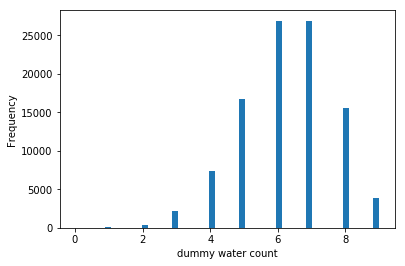

In [25]:
dummy_w = stats.binom.rvs(n=9, p=0.7, size=int(1e5))
f, ax = plt.subplots(1, 1)
ax.hist(dummy_w, bins=50)
ax.set_xlabel("dummy water count")
ax.set_ylabel("Frequency");

### 3.25

In [26]:
w = stats.binom.rvs(n=9, p=0.6, size=int(1e4))

### 3.26

In [27]:
w = stats.binom.rvs(n=9, p=samples)

## Practice

### Easy

In [28]:
# 3.27
p_grid = np.linspace(0, 1, 1000)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(6, n=9, p=p_grid)
posterior = likelihood * prior
posterior = posterior/sum(posterior)
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)

#### 3E1

In [29]:
sum(samples < 0.2)/len(samples)

0.001

#### 3E2

In [30]:
sum(samples > 0.8)/len(samples)

0.1209

#### 3E3

In [31]:
sum((0.2 < samples) & (samples < 0.8))/len(samples)

0.8781

#### 3E4

In [32]:
np.percentile(samples, 20)

0.5155155155155156

#### 3E5

In [33]:
np.percentile(samples, 80)

0.7597597597597597

#### 3E6

In [34]:
pm.hpd(samples, alpha=(1-0.66))

array([0.51651652, 0.78878879])

#### 3E7

In [35]:
np.percentile(samples, [(100-66)/2, (100+66)/2])

array([0.4984985 , 0.77294294])

### Medium

#### 3M1

In [36]:
p_grid = np.linspace(0, 1, 1000)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(8, n=15, p=p_grid)
posterior = likelihood * prior
posterior = posterior/sum(posterior)

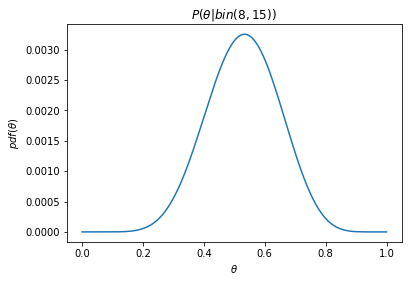

In [37]:
f, ax = plt.subplots(1,1)
ax.plot(p_grid, posterior)
ax.set_xlabel("$\\theta$")
ax.set_ylabel("$pdf(\\theta)$")
ax.set_title("$P(\\theta|bin(8, 15))$");

#### 3M2

In [38]:
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
pm.hpd(samples, alpha=(1-0.9))

array([0.33733734, 0.72572573])

#### 3M3

P(8 water in 15 tosses) =  0.1458


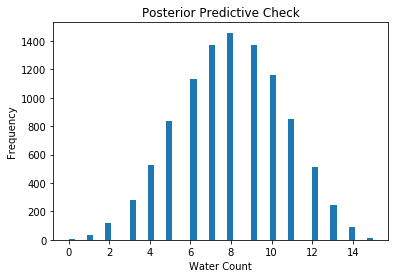

In [39]:
w = stats.binom.rvs(n=15, p=samples)
f, ax = plt.subplots(1, 1)
ax.hist(w, bins=50)
ax.set_xlabel("Water Count")
ax.set_ylabel("Frequency")
ax.set_title("Posterior Predictive Check")
print("P(8 water in 15 tosses) = ", sum(w == 8)/len(w))

#### 3M4

In [40]:
weighted_probability = np.sum(stats.binom.pmf(6, n=9, p=p_grid)*posterior)
print("P(6 water in 9 tosses) = ", weighted_probability)

P(6 water in 9 tosses) =  0.1763898236640191


#### 3M5

In [41]:
p_grid = np.linspace(0, 1, 1000)
prior_ustd = np.where(p_grid < 0.5, 0, 1)
prior = prior_ustd/sum(prior_ustd)
likelihood = stats.binom.pmf(8, n=15, p=p_grid)
posterior_ustd = likelihood * prior
posterior = posterior_ustd/sum(posterior_ustd)

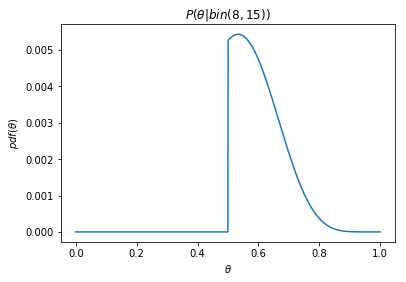

In [42]:
f, ax = plt.subplots(1,1)
ax.plot(p_grid, posterior)
ax.set_xlabel("$\\theta$")
ax.set_ylabel("$pdf(\\theta)$")
ax.set_title("$P(\\theta|bin(8, 15))$");

In [43]:
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
pm.hpd(samples, alpha=(1-0.9))

array([0.5005005 , 0.71271271])

P(8 water in 15 tosses) =  0.1569


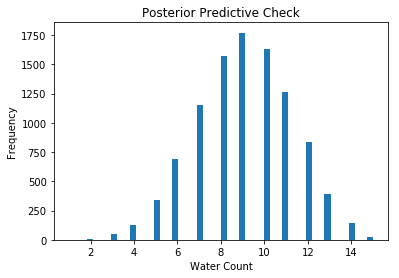

In [44]:
w = stats.binom.rvs(n=15, p=samples)
f, ax = plt.subplots(1, 1)
ax.hist(w, bins=50)
ax.set_xlabel("Water Count")
ax.set_ylabel("Frequency")
ax.set_title("Posterior Predictive Check")
print("P(8 water in 15 tosses) = ", sum(w == 8)/len(w))

In [45]:
weighted_probability = np.sum(stats.binom.pmf(6, n=9, p=p_grid)*posterior)
print("P(6 water in 9 tosses) = ", weighted_probability)

P(6 water in 9 tosses) =  0.23230713290578206


In the case of both priors, the true value `p = 0.7` is inside the 90% hpd bounds, but in the latter the bounds are about 30% tighter.

The new prior makes us "less wrong", since we have significantly smaller bounds around the true value we care about.

### Hard

In [46]:
# 3.28
birth1 = np.array([1,0,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,1,0, 
                   0,0,0,1,1,1,0,1,0,1,1,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0, 
                   1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,1,1,0,1,0,1,1,1,1,1,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,1])
birth2 = np.array([0,1,0,1,0,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,0,0,1,1,1,0,
                   1,1,1,0,1,1,1,0,1,0,0,1,1,1,1,0,0,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,
                   1,1,1,0,1,1,0,1,1,0,1,1,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,1,1,
                   0,0,0,1,1,1,0,0,0,0])

In [47]:
# 3.30
sum(birth1) + sum(birth2)

111

#### 3H1

In [48]:
p_grid = np.linspace(0, 1, 1000)
prior = np.repeat(1, 1000)
likelihood = stats.binom.pmf(sum(birth1)+sum(birth2), n=len(birth1)+len(birth2), p=p_grid)
posterior_ustd = likelihood * prior
posterior = posterior_ustd/sum(posterior_ustd)

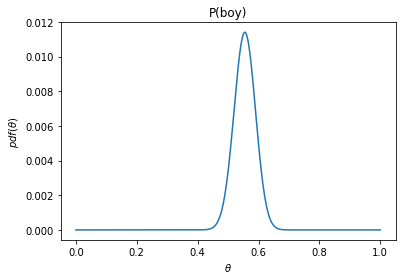

In [49]:
f, ax = plt.subplots(1,1)
ax.plot(p_grid, posterior)
ax.set_xlabel("$\\theta$")
ax.set_ylabel("$pdf(\\theta)$")
ax.set_title("P(boy)");

In [50]:
p_grid[np.argmax(posterior)]

0.5545545545545546

#### 3H2

In [51]:
np.random.seed(100)
samples = np.random.choice(p_grid, p=posterior, size=int(1e4), replace=True)
(pm.hpd(samples, alpha=(1-0.50)),
 pm.hpd(samples, alpha=(1-0.89)),
 pm.hpd(samples, alpha=(1-0.97)))

(array([0.52952953, 0.57557558]),
 array([0.5005005 , 0.61261261]),
 array([0.47747748, 0.62762763]))

#### 3H3

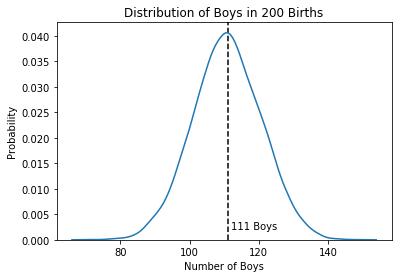

In [52]:
w = stats.binom.rvs(n=200, p=samples)
f, ax = plt.subplots(1, 1)
sns.kdeplot(w, ax=ax)
ax.vlines(111, 0, 0.05, linestyles="dashed");
ax.text(112, 0.002, "111 Boys")
ax.set_xlabel("Number of Boys")
ax.set_ylabel("Probability")
ax.set_title("Distribution of Boys in 200 Births");

#### 3H4

In [53]:
print("Number of boys in the first births", np.sum(birth1))

Number of boys in the first births 51


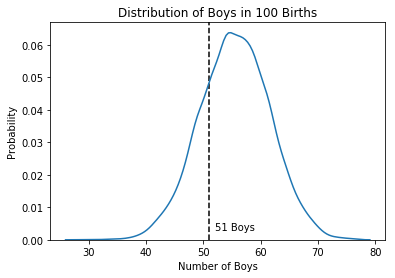

In [54]:
w = stats.binom.rvs(n=100, p=samples)
f, ax = plt.subplots(1, 1)
sns.kdeplot(w, ax=ax)
ax.vlines(51, 0, 0.07, linestyles="dashed");
ax.text(52, 0.003, "51 Boys")
ax.set_xlabel("Number of Boys")
ax.set_ylabel("Probability")
ax.set_title("Distribution of Boys in 100 Births");

#### 3H5

In [55]:
print("Number of first born girls", len(birth1) - np.sum(birth1))

Number of first born girls 49


In [56]:
print("Number of boys who followed girls", np.sum(np.where(birth1 == 0, 1, 0) * birth2))

Number of boys who followed girls 39


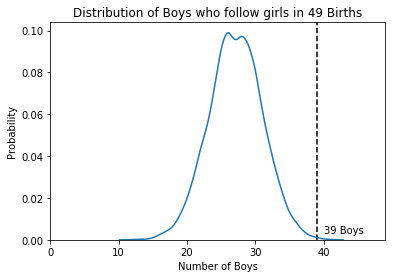

In [57]:
w = stats.binom.rvs(n=49, p=samples)
f, ax = plt.subplots(1, 1)
sns.kdeplot(w, ax=ax)
ax.vlines(39, 0, 0.11, linestyles="dashed");
ax.text(40, 0.003, "39 Boys")
ax.set_xlim(0, 49)
ax.set_xlabel("Number of Boys")
ax.set_ylabel("Probability")
ax.set_title("Distribution of Boys who follow girls in 49 Births");

It's a lot more likely that a boy follows a girl than the model predicts. This implies that either there is a selection effect in the way we choose births here or births that follow girls are more likely to be boys. I personally favour the former.